### Data Import

In [75]:
import numpy as np
import scipy.stats as stats

# Import the data from the text file into two seperate lists
data_exp = np.loadtxt("Project_Data_Explosive.txt")
data_eff = np.loadtxt("Project_Data_Effusive.txt")
data_all = np.loadtxt("Project_Data_All.txt")

# The variables are in the order of dissolved water, crystallinity, storage temperature, and the melt composition (which 
# consists of SiO2, TiO2, Al2O3, FeO, MgO, CaO, Na2O, and K2O) for a total for 11 different variables. For the sake of 
# convenience, they will be numbered from 1-11 for the rest of the analysis. Since both dissolved water and storage
# temperature are expected to have a non-linear correlation, they will be tested seperately using the Chi-Squared 
# Contingency Test, while the rest of the variables will be tested using the Mann-Whitney or Unpaired t-Test.

### Graphing

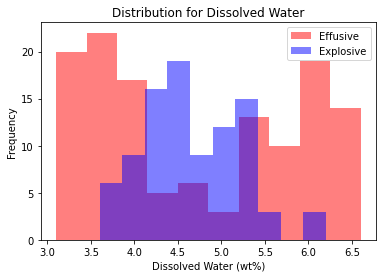

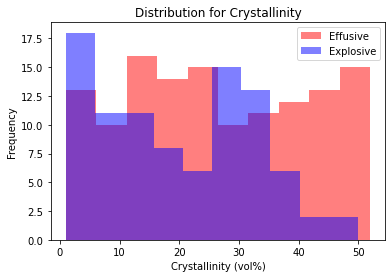

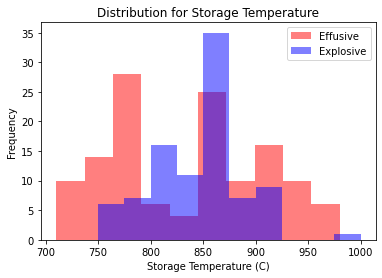

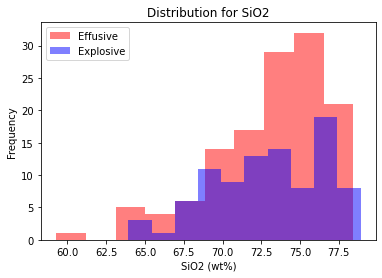

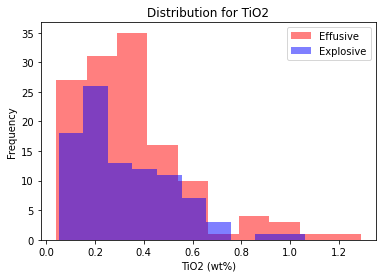

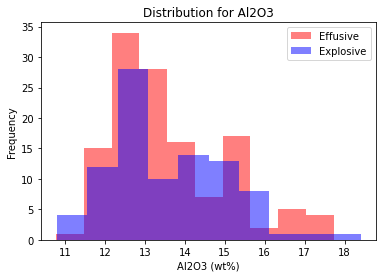

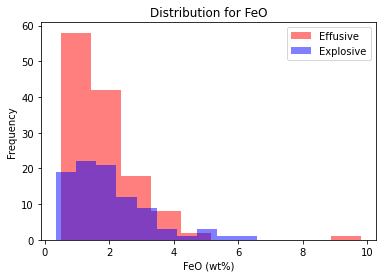

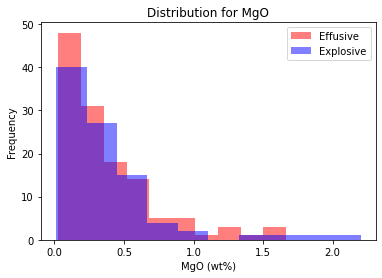

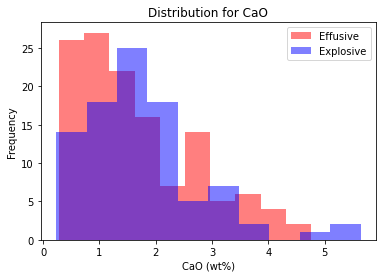

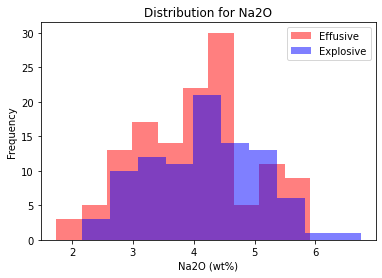

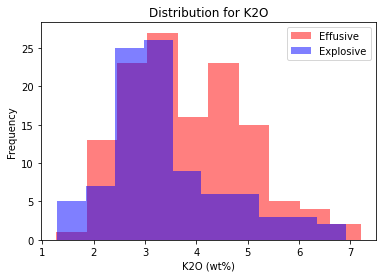

In [81]:
# To visually see the difference in the mean between the effusive and explosive distributions for each variable
# overlapping histograms are used
import matplotlib.pyplot as plt

variable = ["Dissolved Water","Crystallinity","Storage Temperature","SiO2","TiO2","Al2O3","FeO","MgO","CaO","Na2O","K2O"]
Unit = ["wt%","vol%","C","wt%","wt%","wt%","wt%","wt%","wt%","wt%","wt%",]

for i in range(11):
    plt.hist(data_eff[:,i],bins=10,color='red',alpha=0.5,label="Effusive")
    plt.hist(data_exp[:,i],bins=10,color='blue',alpha=0.5,label="Explosive")
    plt.title("Distribution for "+variable[i])
    plt.ylabel("Frequency")
    plt.xlabel(variable[i]+" ("+Unit[i]+")")
    plt.legend(loc='best')
    plt.show()

### Calculating Mean and Normalcy

In [77]:
# Create an array to store the means of the variables
means = np.zeros((11,2), dtype=float)
# Iterate through the lists to calculate the mean values for each variable and store them in the array
for i in range(11):
    if i == 0 or i == 2:
        continue
    else:
        means[i,0] = np.mean(data_exp[:,i])
        means[i,1] = np.mean(data_eff[:,i])

print(means)

# Check for normalcy for each variable in the dataset using the Normalcy Test
for j in range(11):
    if j == 0 or j == 2:
        continue
    else:
        statMeans, pNormMeans = stats.normaltest(data_all[:,j])
        if pNormMeans > 0.05:
            print("We confirm Variable", j+1, "dataset IS distributed normally with a p-value of", pNormMeans)
        else:
            print("We confirm Variable", j+1, "dataset is NOT distributed normally with a p-value of", pNormMeans)     

# Since most of the variables are not normally distributed, a non-parametric test must be used.

[[ 0.          0.        ]
 [20.7173913  26.84496124]
 [ 0.          0.        ]
 [72.99230808 73.10839988]
 [ 0.32996361  0.34279429]
 [13.57541022 13.56409417]
 [ 1.98352076  1.81128796]
 [ 0.3695084   0.36914764]
 [ 1.69106659  1.67723543]
 [ 4.18525959  4.00338875]
 [ 3.37895869  3.82750743]]
We confirm Variable 2 dataset is NOT distributed normally with a p-value of 4.537614929919166e-11
We confirm Variable 4 dataset is NOT distributed normally with a p-value of 3.32517341883535e-05
We confirm Variable 5 dataset is NOT distributed normally with a p-value of 3.9642381027895355e-14
We confirm Variable 6 dataset is NOT distributed normally with a p-value of 4.3740999968351204e-05
We confirm Variable 7 dataset is NOT distributed normally with a p-value of 6.253816361261145e-28
We confirm Variable 8 dataset is NOT distributed normally with a p-value of 3.0738536999579956e-25
We confirm Variable 9 dataset is NOT distributed normally with a p-value of 3.3338630987268214e-09
We confirm Va

### Analysis

In [78]:
# The Mann-Whitney test is a suitable non-parametric test that compared the mean differences between two independent 
# samples. In this case, we are comparing the mean differences between the explosive and effusive datasets for each 
# variable. The null hypothesis that there is no difference between the means, and therefore no correlation between the
# variable and the eruptive style. The alternative hypothesis is that there exists a significant difference between
# the datasets and a correlation between the variable and the eruptive style.

for k in range(11):
    if k == 0 or k == 2:
        continue
    else:
        means_u, means_pVal = stats.mannwhitneyu(data_exp[:,k], data_eff[:,k], alternative='two-sided')
        print("For variable", k+1, ":")
        print("U Statistic:", means_u, "| p-Value:", means_pVal)
        if means_pVal < 0.05:
            print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference")
        else:
            print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference")


For variable 2 :
U Statistic: 4585.5 | p-Value: 0.003990570064305789
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference
For variable 4 :
U Statistic: 5722.0 | p-Value: 0.651717906458275
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference
For variable 5 :
U Statistic: 5910.0 | p-Value: 0.9599920704138808
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference
For variable 6 :
U Statistic: 6047.0 | p-Value: 0.8102531594888613
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference
For variable 7 :
U Statistic: 6477.0 | p-Value: 0.2469472244299239
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference
For variable 8 :
U Statistic: 6015.0 | p-Value: 0.8635701256799065
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference
For variable 9 :
U Statistic: 6242.0 | p-Value: 0.5116544000736851
Since

In [79]:
# Only the Crystallinity and K2O contents (Variable 2 and 11) showed significant differences between the effusive and 
# explosive eruptions
print("The mean crystallinity for the explosive eruptions is", means[1,0], "while the mean for effusive eruptions is", 
      means[1,1], "%")
print("The mean K2O content for the explosive eruptions is", means[10,0], "while the mean for effusive eruptions is", 
      means[10,1], "%")

The mean crystallinity for the explosive eruptions is 20.717391304347824 while the mean for effusive eruptions is 26.844961240310077 %
The mean K2O content for the explosive eruptions is 3.378958687836956 while the mean for effusive eruptions is 3.827507428728682 %


In [71]:
# Test for Dissolved Water

# Create the Chi-Squared Contingency Table
counts = np.zeros((3,2), dtype=int)
for i in range(129):
    if data_eff[i,0] < 3.5:
        counts[0,0] += 1
    elif data_eff[i,0] >= 3.5 and data_eff[i,0] <= 5:
        counts[1,0] += 1
    else:
        counts[2,0] += 1

for i in range(92):
    if data_exp[i,0] < 3.5:
        counts[0,1] += 1
    elif data_exp[i,0] >= 3.5 and data_exp[i,0] <= 5:
        counts[1,1] += 1
    else:
        counts[2,1] += 1

print(counts)
# Use chi2_contingency function to find the chi-squared statistic and the p-value for this data, with the null hypothesis
# being there is no difference between the two columns (between effusive and explosive)

chi2_statistic, p_value, dof, ex = stats.chi2_contingency(counts)
print("P-value:", p_value)
if p_value < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference")
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference")
    

[[20  0]
 [51 71]
 [58 21]]
P-value: 2.0500399846934562e-08
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference


In [73]:
# Repeat the process for Storage Temperature

# Create the Chi-Squared Contingency Table
counts2 = np.zeros((3,2), dtype=int)
for i in range(129):
    if data_eff[i,2] < 770:
        counts2[0,0] += 1
    elif data_eff[i,2] >= 770 and data_eff[i,2] <= 850:
        counts2[1,0] += 1
    else:
        counts2[2,0] += 1

for i in range(92):
    if data_exp[i,2] < 770:
        counts2[0,1] += 1
    elif data_exp[i,2] >= 770 and data_exp[i,2] <= 850:
        counts2[1,1] += 1
    else:
        counts2[2,1] += 1

print(counts2)

# Use chi2_contingency function to find the chi-squared statistic and the p-value for this data, with the null hypothesis
# being there is no difference between the two columns (between effusive and explosive)

chi2_statistic, p_value, dof, ex = stats.chi2_contingency(counts2)
print("P-value:", p_value)
if p_value < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference")
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference")
    

[[25  4]
 [47 54]
 [57 34]]
P-value: 0.00037971267827589
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference
